Absolute Minimum: 0.00%
Absolute Maximum: 0.13%
Absolute Average: 0.04%
Absolute Median: 0.03%
[-0.0021417044737903623, -0.011861682213476499, -0.02849968112245138, -0.033150918828617204, -0.012381801521199609, -0.04224629854787665, 0.020032051282048435, -0.043859284819258715, 0.03439460002201411, 0.06677370338343813, -0.025452488687782715, 0.03522798362625146, 0.04901372898391543, -0.02633553964120905, -0.01962699142157298, -0.07495777027026751, 0.07648078762754196, -0.02664452571706777, -0.031339497934845806, 0.04184665833573131, 0.009540144804942585, -0.06446024919332105, 0.020595492445263375, -0.027173539282565606, 0.014608804281657228, 0.013832330028318296, -0.045420454986044856, -0.036868916310184296, 0.053601916652579185, 0.025199663521036086, -0.03154375399762044, 0.034208365918675376, 0.052171717575988374, -0.07203193261857699, 0.05054944550528795, -0.011932715941009864, 0.021150486021848103, -0.0483794615768085, 0.033454175265323904, -0.06171159683519001, -0.06402250510364471

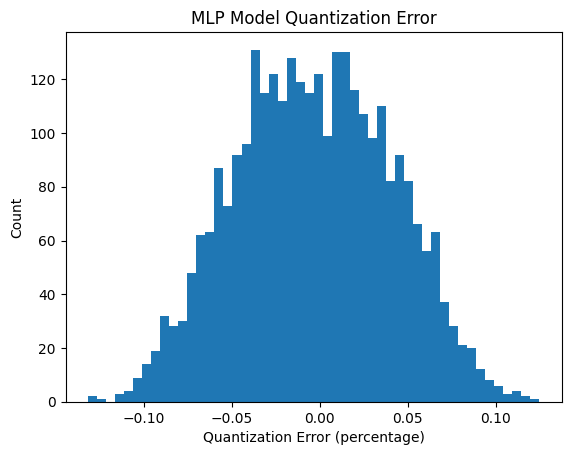

In [16]:
# import dependencies
# import ezkl, json, onnx, onnxruntime
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # setup the settings file for ezkl
# run_args = ezkl.PyRunArgs()
# run_args.input_visibility = "public"
# run_args.param_visibility = "public"
# run_args.output_visibility = "public"
# run_args.variables = [("batch_size", 1)]

# def generate_settings(model):
#     # generate the settings file
#     try:
#         res = ezkl.gen_settings(f"{model}.onnx",
#                                 "settings.json",
#                                 py_run_args=run_args)
#     except Exception as e:
#         print(f"An error occurred: {e}")
        
# async def calibrate_settings(model, input_file):
#     # calibrate the settings file
#     try:
#         res = await ezkl.calibrate_settings(f"{input_file}.json",
#                                             f"{model}.onnx",
#                                             "settings.json",
#                                             "resources")
#     except Exception as e:
#         print(f"An error occurred: {e}")

# def compile_circuit(model):
#     # compile model
#     try:
#         res = ezkl.compile_circuit(f"{model}.onnx",
#                                    f"compiled_{model}.onnx")
#     except Exception as e:
#         print(f"An error occurred: {e}")

# def gen_witness(model, input_file):
#     # generate witness file
#     try:
#         res = ezkl.gen_witness(f"{input_file}.json",
#                                # f"compiled_{model}.onnx",
#                                f"{model}.compiled",
#                                "witness.json")
#         if res:
#             return res
#     except Exception as e:
#         print(f"An error occurred: {e}")

# def get_ezkl_output(witness_output, settings_file):
#     # convert the quantized ezkl output to float value
#     outputs = witness_output["outputs"]
#     with open(settings_file) as f:
#         settings = json.load(f)
#     # ezkl_output = ezkl.vecu64_to_float(outputs[0][0], settings["model_output_scales"][0])
#     ezkl_output_logit_0 = ezkl.felt_to_float(outputs[1][0], settings["model_output_scales"][1])
#     ezkl_output_logit_1 = ezkl.felt_to_float(outputs[1][1], settings["model_output_scales"][1])
#     ezkl_output_logit_2 = ezkl.felt_to_float(outputs[1][2], settings["model_output_scales"][1])
#     logits = [ezkl_output_logit_0, ezkl_output_logit_1, ezkl_output_logit_2]
#     logit = np.max([ezkl_output_logit_0, ezkl_output_logit_1, ezkl_output_logit_2])    
#     # print(logit)
#     return logit
    
# def get_onnx_output(model, input_file):
#     # generate the ML model output from the ONNX file
#     onnx_model = onnx.load(f"{model}.onnx")
#     onnx.checker.check_model(onnx_model)
#     with open(f"{input_file}.json") as f:
#         inputs = json.load(f)
#     inputs_onnx = np.array(inputs["input_data"]).astype(np.float32)
#     onnx_session = onnxruntime.InferenceSession(f"{model}.onnx")
#     onnx_input = {onnx_session.get_inputs()[0].name: inputs_onnx}
#     onnx_output = onnx_session.run(None, onnx_input)
#     # print(np.max(onnx_output[1][0]))
#     return np.max(onnx_output[1][0])

# def compare_outputs(zk_output, onnx_output):
#     # calculate percentage difference between the 2 outputs
#     return ((onnx_output/zk_output) - 1) * 100
    
# # generate and calibrate settings - assuming that the trained model is called 'model' and the input 
# # data required for calibration is saved as 'input.json'
# # generate_settings("model")
# # await calibrate_settings(model="model", input_file="input") # '.json' is omitted as it's part of the function
# # ezkl compile model
# # compile_model("model")

# # instantiate empty lists to store predictions and differences
# ezkl_pred_output_list_model = []
# onnx_pred_output_list_model= []
# perc_diff_output_list_model= []

# # loop over 3,000 input files (customizable as per your requirements) and calculate the quantization error for each corresponding prediction
# # all 3k input files are saved as input_1, input_2, etc.
# for i in range(3000):
#     # witness = gen_witness(model="network.compiled", input_file=f"input_{i}")
#     witness = await gen_witness(model="network", input_file=f"test_inputs/input_{i}")
#     # print(witness)
#     ezkl_output = get_ezkl_output(witness_output=witness, settings_file="settings.json")
#     # onnx_output = get_onnx_output(model_v="network.compiled", input_file=f"input_{i}")
#     onnx_output = get_onnx_output(model="network", input_file=f"test_inputs/input_{i}")
#     # there may be edge cases where ezkl_output = 0. If yes, then handle them appropriately
#     if ezkl_output != 0:
#         perc_diff = compare_outputs(zk_output=ezkl_output, onnx_output=onnx_output)
#         onnx_pred_output_list_model.append(onnx_output)
#         ezkl_pred_output_list_model.append(ezkl_output)
#         perc_diff_output_list_model.append(perc_diff)
#     elif ezkl_output == 0 and onnx_output - ezkl_output < 0.1:
#         ezkl_output = onnx_output
#         perc_diff = compare_outputs(zk_output=ezkl_output, onnx_output=onnx_output)
#         onnx_pred_output_list_model.append(onnx_output)
#         ezkl_pred_output_list_model.append(ezkl_output)
#         perc_diff_output_list_model.append(perc_diff)

# # calculate absolute min, max, mean, & median
print(f"Absolute Minimum: {pd.Series(perc_diff_output_list_model).abs().min():.2f}%")
print(f"Absolute Maximum: {pd.Series(perc_diff_output_list_model).abs().max():.2f}%")
print(f"Absolute Average: {pd.Series(perc_diff_output_list_model).abs().mean():.2f}%")
print(f"Absolute Median: {pd.Series(perc_diff_output_list_model).abs().median():.2f}%")

x = list(pd.Series(perc_diff_output_list_model))
print(x)
# plot a histogram
plt.hist(pd.Series(perc_diff_output_list_model), bins=50)
plt.xlabel("Quantization Error (percentage)")
plt.ylabel("Count")
plt.title("MLP Model Quantization Error");

from scipy.stats import shapiro
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

from scipy.stats import kstest, norm

# normality test
stat, p = kstest(x, 'norm')
# Interpret the results
alpha = 0.05
print(f"Kolmogorov-Smirnov Test: Statistics={stat:.3f}, p-value={p:.3f}")
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")
